In [1]:
###########################################################################################################
##Due to the limitations of the computing power of the laptop, I choose one type of category and         ##
##the first 30 lines of the dataset and reduced the learning rate                                        ## 
##                                                                                                       ##
###########################################################################################################
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import torch
from torch.autograd import Variable
import numpy as np
import torch.functional as F
import torch.nn.functional as F
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [14]:
def preprocess(sentence):
    
    wordnet_lemmatizer = WordNetLemmatizer()
    sentence = stemmer.stem(sentence) #remove endings
    sentence = sentence.lower() #for writing from small litter
    tokenizer = RegexpTokenizer(r'\w+') #  #for removing puntuations
    tokens = tokenizer.tokenize(sentence)
    filtered_words = [wordnet_lemmatizer.lemmatize(word) for word in tokens]
    filtered_words = [w for w in tokens if not w in stopwords.words('english')] #remove stop words
    filtered_words = [c for c in filtered_words if not c.isdigit()] #remove numbers
    return " ".join(filtered_words)

In [15]:
url="bbc_text.csv"
dataset = pd.read_csv(url)
dataset = dataset[dataset.category == 'tech']
dataset.index = np.arange(len(dataset))
dataset = dataset[:30]
print(dataset.head())
print(len(dataset))

  category                                               text
0     tech  tv future in the hands of viewers with home th...
1     tech  games maker fights for survival one of britain...
2     tech  security warning over  fbi virus  the us feder...
3     tech  halo 2 heralds traffic explosion the growing p...
4     tech  mobile audio enters new dimension as mobile ph...
30


In [16]:
corpus = dataset['text']
print(corpus)

0     tv future in the hands of viewers with home th...
1     games maker fights for survival one of britain...
2     security warning over  fbi virus  the us feder...
3     halo 2 heralds traffic explosion the growing p...
4     mobile audio enters new dimension as mobile ph...
5     mobile gig aims to rock 3g forget about going ...
6     firefox browser takes on microsoft microsoft s...
7     gamers snap up new sony psp gamers have bought...
8     pandas benefit from wireless net the world s d...
9     broadband in the uk growing fast high-speed ne...
10    microsoft gets the blogging bug software giant...
11    tech helps disabled speed demons an organisati...
12    loyalty cards idea for tv addicts viewers coul...
13    web radio takes spanish rap global spin the ra...
14    screensaver tackles spam websites net users ar...
15    ibm frees 500 software patents computer giant ...
16    seamen sail into biometric future the luxury c...
17    europe backs digital tv lifestyle how peop

In [17]:
tokenized_corpus = []
stemmer = PorterStemmer()
for i in range(len(corpus)):
    sentence = preprocess(corpus[i])
    tokenized_corpus.append(word_tokenize((sentence)))
print(tokenized_corpus)

[['tv', 'future', 'hands', 'viewers', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'digital', 'video', 'recorders', 'moving', 'living', 'room', 'way', 'people', 'watch', 'tv', 'radically', 'different', 'five', 'years', 'time', 'according', 'expert', 'panel', 'gathered', 'annual', 'consumer', 'electronics', 'show', 'las', 'vegas', 'discuss', 'new', 'technologies', 'impact', 'one', 'favourite', 'pastimes', 'us', 'leading', 'trend', 'programmes', 'content', 'delivered', 'viewers', 'via', 'home', 'networks', 'cable', 'satellite', 'telecoms', 'companies', 'broadband', 'service', 'providers', 'front', 'rooms', 'portable', 'devices', 'one', 'talked', 'technologies', 'ces', 'digital', 'personal', 'video', 'recorders', 'dvr', 'pvr', 'set', 'top', 'boxes', 'like', 'us', 'tivo', 'uk', 'sky', 'system', 'allow', 'people', 'record', 'store', 'play', 'pause', 'forward', 'wind', 'tv', 'programmes', 'want', 'essentially', 'technology', 'allows', 'much', 'personalised', 'tv', 'al

In [18]:
vocabulary = []
for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)

word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)
print(vocabulary)

['tv', 'future', 'hands', 'viewers', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'digital', 'video', 'recorders', 'moving', 'living', 'room', 'way', 'people', 'watch', 'radically', 'different', 'five', 'years', 'time', 'according', 'expert', 'panel', 'gathered', 'annual', 'consumer', 'electronics', 'show', 'las', 'vegas', 'discuss', 'new', 'technologies', 'impact', 'one', 'favourite', 'pastimes', 'us', 'leading', 'trend', 'programmes', 'content', 'delivered', 'via', 'networks', 'cable', 'satellite', 'telecoms', 'companies', 'broadband', 'service', 'providers', 'front', 'rooms', 'portable', 'devices', 'talked', 'ces', 'personal', 'dvr', 'pvr', 'set', 'top', 'boxes', 'like', 'tivo', 'uk', 'sky', 'system', 'allow', 'record', 'store', 'play', 'pause', 'forward', 'wind', 'want', 'essentially', 'technology', 'allows', 'much', 'personalised', 'also', 'built', 'sets', 'big', 'business', 'japan', 'slower', 'take', 'europe', 'lack', 'programming', 'adverts', 'forget', 'a

In [19]:
word2idx

{'tv': 0,
 'future': 1,
 'hands': 2,
 'viewers': 3,
 'home': 4,
 'theatre': 5,
 'systems': 6,
 'plasma': 7,
 'high': 8,
 'definition': 9,
 'tvs': 10,
 'digital': 11,
 'video': 12,
 'recorders': 13,
 'moving': 14,
 'living': 15,
 'room': 16,
 'way': 17,
 'people': 18,
 'watch': 19,
 'radically': 20,
 'different': 21,
 'five': 22,
 'years': 23,
 'time': 24,
 'according': 25,
 'expert': 26,
 'panel': 27,
 'gathered': 28,
 'annual': 29,
 'consumer': 30,
 'electronics': 31,
 'show': 32,
 'las': 33,
 'vegas': 34,
 'discuss': 35,
 'new': 36,
 'technologies': 37,
 'impact': 38,
 'one': 39,
 'favourite': 40,
 'pastimes': 41,
 'us': 42,
 'leading': 43,
 'trend': 44,
 'programmes': 45,
 'content': 46,
 'delivered': 47,
 'via': 48,
 'networks': 49,
 'cable': 50,
 'satellite': 51,
 'telecoms': 52,
 'companies': 53,
 'broadband': 54,
 'service': 55,
 'providers': 56,
 'front': 57,
 'rooms': 58,
 'portable': 59,
 'devices': 60,
 'talked': 61,
 'ces': 62,
 'personal': 63,
 'dvr': 64,
 'pvr': 65,
 'set

In [20]:
window_size = 2
idx_pairs = []
# for each sentence
for sentence in tokenized_corpus:
    indices = [word2idx[word] for word in sentence]
    # for each word, threated as center word
    for center_word_pos in range(len(indices)):
        # for each window position
        for w in range(-window_size, window_size + 1):
            context_word_pos = center_word_pos + w
            # make soure not jump out sentence
            if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
                continue
            context_word_idx = indices[context_word_pos]
            idx_pairs.append((indices[center_word_pos], context_word_idx))

idx_pairs = np.array(idx_pairs) # it will be useful to have this as numpy array

In [21]:
idx_pairs[:10]
print(len(idx_pairs))

31368


In [22]:
def get_input_layer(word_idx):
    x = torch.zeros(vocabulary_size).float()
    x[word_idx] = 1.0
    return x
  
  #Input layer is just the center word encoded in one-hot manner. It dimensions are [1, vocabulary_size]

In [23]:
embedding_dims = 5
W1 = Variable(torch.randn(embedding_dims, vocabulary_size).float(), requires_grad=True)
W2 = Variable(torch.randn(vocabulary_size, embedding_dims).float(), requires_grad=True)
num_epochs = 101
learning_rate = 0.01
#idx_pairs = idx_pairs[:100]
for epo in range(num_epochs):
    loss_val = 0
    for data, target in idx_pairs:
        x = Variable(get_input_layer(data)).float()
        y_true = Variable(torch.from_numpy(np.array([target])).long())

        z1 = torch.matmul(W1, x)
        z2 = torch.matmul(W2, z1)
    
        log_softmax = F.log_softmax(z2, dim=0)

        loss = F.nll_loss(log_softmax.view(1,-1), y_true)
        loss_val += loss.data.item()
        loss.backward()
        W1.data -= learning_rate * W1.grad.data
        W2.data -= learning_rate * W2.grad.data
        vec = W2.data
        #print(vec)
        W1.grad.data.zero_()
        W2.grad.data.zero_()
    if epo % 10 == 0:    
        print(f'Loss at epo {epo}: {loss_val/len(idx_pairs)}')

Loss at epo 0: 9.725199391680146
Loss at epo 10: 7.823197525272987
Loss at epo 20: 7.298149595969613
Loss at epo 30: 7.006154959738725
Loss at epo 40: 6.8124846917456185
Loss at epo 50: 6.6650523921416385
Loss at epo 60: 6.548735307631703
Loss at epo 70: 6.455562152460624
Loss at epo 80: 6.380117986525118
Loss at epo 90: 6.318625618109621
Loss at epo 100: 6.26808382673733


In [29]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def homework(word):
    index_of_word = -1
    for i in range(len(vocabulary)):
        if  (vocabulary[i] == word):
            index_of_word = i
    if (index_of_word < 0):
        print('word does not exist on dataset')
    if (index_of_word >= 0):
        print('index of the word', vocabulary[index_of_word],' is ',index_of_word)
        print('task1 Thensors of words')
        print(W2.data)
        cos_distance = []
        labels = []
        aaa = np.array(W2.data)
        for j in range(len(W2)):
            result = np.dot(np.array(aaa[j]),np.array(aaa[index_of_word]))/(((np.sum(aaa[j]**2))**0.5) * ((np.sum(aaa[index_of_word]**2))**0.5))
            cos_distance.append([result, j])
        cos_distance_sorted = sorted(cos_distance, key=lambda x: x[0], reverse=True)
        for i in (range(10)):
            print(cos_distance_sorted[i], vocabulary[cos_distance_sorted[i][1]])
            labels.append(vocabulary[cos_distance_sorted[i][1]])
        array_for_dot_cloud = []
        array_for_dot_cloud_label = []
        for i in range(11):
            array_for_dot_cloud.append(np.array(aaa[cos_distance_sorted[i][1]]))
            array_for_dot_cloud_label.append(vocabulary[cos_distance_sorted[i][1]])
        print(W2[cos_distance_sorted[i][1]], vocabulary[cos_distance_sorted[i][1]])
        array_for_dot_cloud = np.array(array_for_dot_cloud)
        print(array_for_dot_cloud)
        X_embedded = TSNE(n_components=2).fit_transform(array_for_dot_cloud)
        X_embedded.shape
        #print(X_embedded)
        x = []
        y = []
        new_values = X_embedded
        for value in new_values:
            x.append(value[0])
            y.append(value[1])
        plt.figure(figsize=(10, 10)) 
        for i in range(len(x)):
            plt.scatter(x[i],y[i])
            plt.annotate(array_for_dot_cloud_label[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        plt.show()

index of the word america  is  981
task1 Thensors of words
tensor([[ 0.9203, -2.6823,  0.3245,  1.0577,  0.5302],
        [ 2.2206, -0.5513,  1.1980,  0.1821,  0.4057],
        [ 0.6605, -0.8502, -0.1020,  0.7015, -0.7737],
        ...,
        [ 0.2139, -0.2609, -0.6891,  0.1354,  0.0860],
        [-1.0509, -0.1614, -0.6860,  0.7785, -0.4637],
        [-0.9321,  0.6153, -1.1246,  0.7552,  0.0557]])
[1.0, 981] america
[0.9933493049939317, 1695] trialled
[0.9911435880585083, 757] six
[0.9794295045308511, 2700] hits
[0.9710028008713927, 2193] blind
[0.9674125865661349, 2415] fastest
[0.9611970835052879, 2745] euros
[0.9603159861486775, 2328] wider
[0.9517660414136999, 2419] acclaim
[0.9516196933538253, 394] premises
tensor([-0.3948, -0.3655, -1.1403, -0.6835,  0.0536], grad_fn=<SelectBackward>) messenger
[[-0.34104207 -0.0414171  -1.4403807  -0.7715829   0.39512038]
 [-0.31996098  0.04036531 -1.178478   -0.73388594  0.21993382]
 [-0.19824019  0.09980797 -1.4217128  -0.8821214   0.4158377

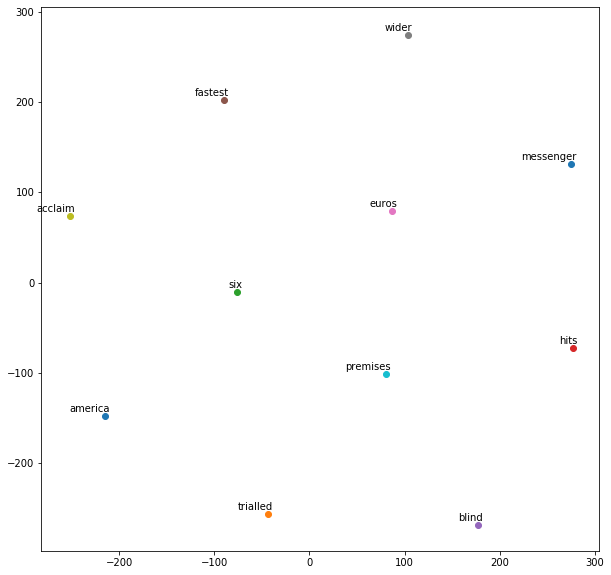

In [30]:
homework('america')

index of the word psp  is  966
task1 Thensors of words
tensor([[ 0.9203, -2.6823,  0.3245,  1.0577,  0.5302],
        [ 2.2206, -0.5513,  1.1980,  0.1821,  0.4057],
        [ 0.6605, -0.8502, -0.1020,  0.7015, -0.7737],
        ...,
        [ 0.2139, -0.2609, -0.6891,  0.1354,  0.0860],
        [-1.0509, -0.1614, -0.6860,  0.7785, -0.4637],
        [-0.9321,  0.6153, -1.1246,  0.7552,  0.0557]])
[0.9999999365236585, 966] psp
[0.9846486853050733, 553] main
[0.9778736713067981, 92] japan
[0.9689795551861887, 267] recorded
[0.9615844140272769, 2699] gizmondo
[0.9587318044915673, 2159] expected
[0.9581971110721272, 992] nintendo
[0.9578767866059964, 59] portable
[0.9532856949005529, 285] sale
[0.9382762747976227, 95] europe
tensor([ 0.7994, -1.0660, -1.7479,  0.1297,  1.5737], grad_fn=<SelectBackward>) months
[[ 1.5142764  -1.3484308  -1.5641379  -0.09783333  0.97193   ]
 [ 0.728798   -0.9753683  -1.0543035   0.05606765  0.5369063 ]
 [ 1.2522633  -1.674226   -1.5348659   0.05610058  0.6119

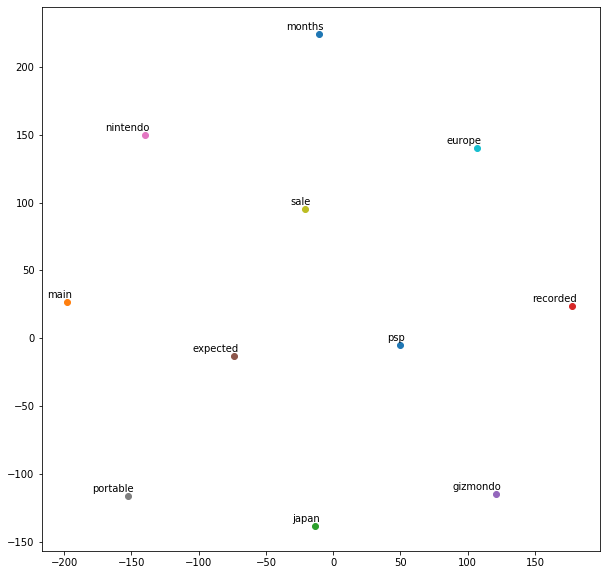

In [32]:
homework('psp')

index of the word technology  is  83
task1 Thensors of words
tensor([[ 0.9203, -2.6823,  0.3245,  1.0577,  0.5302],
        [ 2.2206, -0.5513,  1.1980,  0.1821,  0.4057],
        [ 0.6605, -0.8502, -0.1020,  0.7015, -0.7737],
        ...,
        [ 0.2139, -0.2609, -0.6891,  0.1354,  0.0860],
        [-1.0509, -0.1614, -0.6860,  0.7785, -0.4637],
        [-0.9321,  0.6153, -1.1246,  0.7552,  0.0557]])
[0.9999999277119286, 83] technology
[0.9933612144853553, 354] knew
[0.9756911479884213, 11] digital
[0.9666677965499146, 42] us
[0.9626533065816226, 190] help
[0.9614138973022095, 69] like
[0.9570671817929092, 172] choice
[0.953211329854967, 3] viewers
[0.9525797931737244, 1453] look
[0.9483985033520339, 150] broadcasters
tensor([ 1.1215, -2.6077, -1.1132,  0.7903, -0.4576], grad_fn=<SelectBackward>) music
[[ 1.0176759  -2.906921   -0.4772242   1.61777    -0.928394  ]
 [ 0.34076643 -1.412078   -0.35193524  0.83544433 -0.42201433]
 [ 0.53821087 -2.641722   -0.9728303   1.4410864  -1.194973

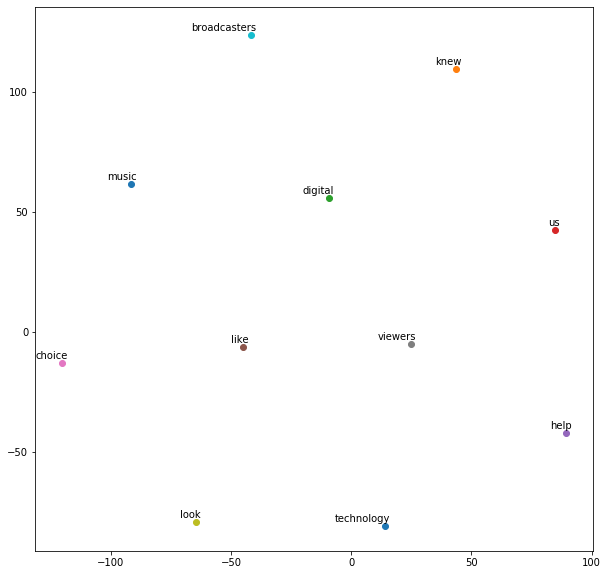

In [34]:
homework('technology')

index of the word bbc  is  136
task1 Thensors of words
tensor([[ 0.9203, -2.6823,  0.3245,  1.0577,  0.5302],
        [ 2.2206, -0.5513,  1.1980,  0.1821,  0.4057],
        [ 0.6605, -0.8502, -0.1020,  0.7015, -0.7737],
        ...,
        [ 0.2139, -0.2609, -0.6891,  0.1354,  0.0860],
        [-1.0509, -0.1614, -0.6860,  0.7785, -0.4637],
        [-0.9321,  0.6153, -1.1246,  0.7552,  0.0557]])
[1.0, 136] bbc
[0.9932861646324405, 330] trouble
[0.9932448626290108, 1696] sweden
[0.9676591756103274, 140] news
[0.9666188877334098, 1743] jollans
[0.9607509196300745, 554] factors
[0.959118677377836, 139] told
[0.9547532461208657, 2138] adequate
[0.9468616206881646, 1865] nigerian
[0.9449355455911423, 548] clarion
tensor([-0.5306,  0.0337, -1.0906,  0.5260, -0.7143], grad_fn=<SelectBackward>) covers
[[-0.25062928  0.03617432 -2.0607007   1.618464   -1.8370695 ]
 [-0.20156905 -0.19815154 -1.4439665   1.1555101  -1.4914646 ]
 [-0.02577252 -0.00322429 -0.5469125   0.4933833  -0.42515278]
 [-0.2

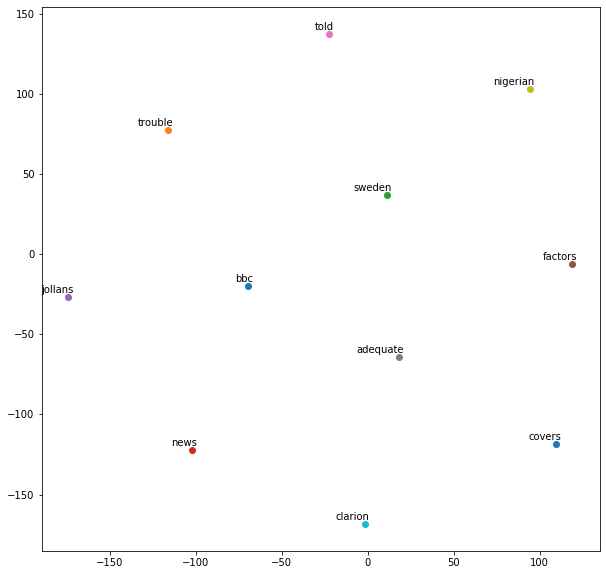

In [35]:
homework('bbc')